In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv(r"C:\Users\ASUS\Downloads\drms_data - drms_data.csv")
features.head()

,ID,timestamp,Atypical_Day,price,load
0,1,6/1/14 12.00 AM,1,1.46,0.12
1,2,6/1/14 1.00 AM,1,0.73,0.12
2,3,6/1/14 2:00 AM,1,0.73,0.10
3,4,6/1/14 3:00 AM,1,0.73,0.10
4,5,6/1/14 4:00 AM,1,0.73,0.11


In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (745, 5)


In [3]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
features.head()

,ID,Atypical_Day,price,load,timestamp_6/1/14 1.00 AM,timestamp_6/1/14 10:00 AM,timestamp_6/1/14 10:00 PM,timestamp_6/1/14 11:00 AM,timestamp_6/1/14 11:00 PM,timestamp_6/1/14 12.00 AM,...,timestamp_7/1/14 5:00 PM,timestamp_7/1/14 6:00 AM,timestamp_7/1/14 6:00 PM,timestamp_7/1/14 7:00 AM,timestamp_7/1/14 7:00 PM,timestamp_7/1/14 8:00 AM,timestamp_7/1/14 8:00 PM,timestamp_7/1/14 9:00 AM,timestamp_7/1/14 9:00 PM,timestamp_7/2/14 12:00 AM
0,1,1,1.46,0.12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0.73,0.12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0.73,0.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0.73,0.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0.73,0.11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 100)

In [6]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (596, 748)
Training Labels Shape: (596,)
Testing Features Shape: (149, 748)
Testing Labels Shape: (149,)


In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)
# Train the model on training data
rf.fit(train_features, train_labels);


In [8]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.3 degrees.


In [9]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.66 %.


In [10]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
true_date= features[:, feature_list.index('ID')]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': true_date, 'actual': labels})

In [11]:

pred_date = test_features[:, feature_list.index('ID')]


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': pred_date, 'prediction': predictions})

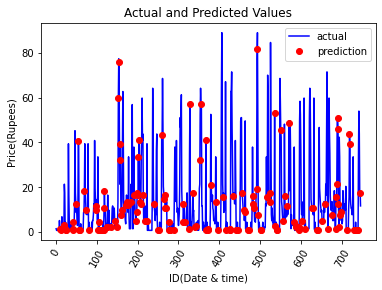

In [12]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('ID(Date & time)'); plt.ylabel('Price(Rupees)'); plt.title('Actual and Predicted Values');